## Сборный Проект - 1

### Описание проекта

Интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:

Name — название игры  
Platform — платформа  
Year_of_Release — год релиза  
Genre — жанр игры  
NA_players — продажи игрокам в Северной Америке (в миллионах долларов)  
EU_players — продажи игрокам в Европе (в миллионах долларов)  
RU_players — продажи игрокам в России (в миллионах долларов)  
Other_players — продажи игрокам в других странах  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг ESRB  

<div style="border:solid blue 2px; padding: 20px"> 

Выполение    
1. [Шаг 1. Обзор данных.](#step1)  
2. [Шаг 2. Исследовательский анализ данных](#step2)  
    [- Распределение по годам выпусков игр](#step3)  
    [- Продажи игр по годам, платформам, жанрам](#step4)  
3. [Шаг 3. Портрет пользователя каждого региона](#step5)  
    [- Топ 5 жанров по регионам](#step6)  
    [- Продажи игр по годам, платформам, жанрам](#step7)  
    [- Топ платформ по регионам](#step8)  
    [- Рейтинг по регионам](#step9)  
4. [Шаг 4. Проверка гипотез](#step10)  
    [- Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый.](#step11)  
    [-  Средний пользовательский рейтинг жанров Action и Sports не различается.](#step12)    
5. [Шаг 5. Вывод](#step13)      

</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**ВЫВОДЫ**

1) что в 80-х, начале 90-х выходило мало игр и поэтому прибыль улетает вверх просто потому, что выборка мала. Как только стало больше игр, доходы падают.  

2)
на DS платформе выпущено больше всего игр  
Action жанра больше всего  
 0  < User_Score < 9.7  
 13 < Critic_Score < 98  
 
3) Наиболее популярный жанр Action в Сев. Америке и Европе. В отличие от России, где самый популярный Role-Playing  
В начале 2000-х продажи выше всго во всех регионах  
Популярные платформы:
X360 - Сев америка
PS2 - Европа
DS  - Россия

4) Довольно сильная корреляция оценок критиков и пользователей (0.58). Что означает, в общем мнения критиков и пользователей совпадают.

5) средний пользовательский рейтинг платформ PS2 и PS3 различается, т е рейтинги не равны  
6) средний пользовательский рейтинг жанров Action и Sports не различается, т е равны  

**Рекомендации о выпуске игры:**  
Если выпускать игру в Сев. амер. или Европе, то в жанре Action или Sport и на платфомах X360 или PS2. 
Если выпускать игру в России, то в жанре Role-Playing или Action и на платфомах DS или PS. 
Для 13-19 лет или для всех   
</div>

### Шаг 1. Обзор данных. <a id="step1"></a>   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats as st
games  = pd.read_csv('/datasets/games.csv')
rating  = pd.read_csv('/datasets/rating.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
rating

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games['Rating'].isna().sum()

6769

In [5]:
print(games['Rating'].value_counts())

E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


In [6]:
games['User_Score'].isna().sum()

6704

In [8]:
games['User_Score'] = games['User_Score'].where(games['User_Score'] != 'tbd', np.nan)

In [9]:
games['User_Score'].isna().sum()

9129

In [10]:
games['Year_of_Release'] = games['Year_of_Release'].fillna(value = games['Year_of_Release'].median())

In [11]:
games['Year_of_Release'] = pd.to_datetime(games['Year_of_Release'],format='%Y')
games['Year_of_Release'] = games['Year_of_Release'].dt.year

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16719 non-null int64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         7590 non-null object
Rating             9950 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [13]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**<font color='blue'>------------------------------------------------------------**</font>

### Шаг 2. Исследовательский анализ данных <a id="step2"></a>   

#### Распределение по годам выпусков игр <a id="step3"></a>   

(1980, 2022)

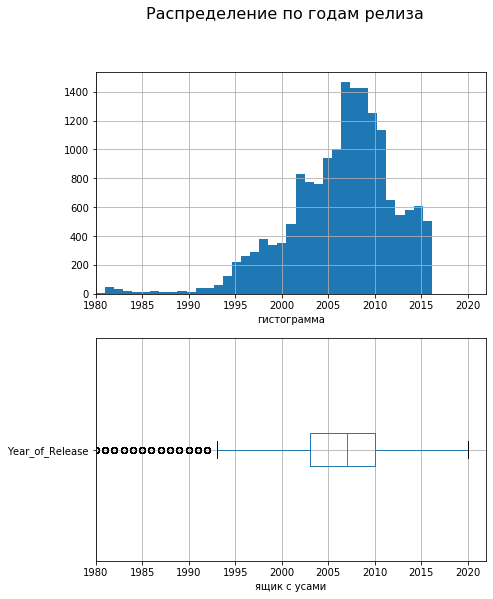

In [16]:
plt.subplots(figsize = (7, 9))
plt.suptitle('Распределение по годам релиза', fontsize=16)
ax = plt.subplot(2, 1, 1)
games['Year_of_Release'].hist(bins=43,range=(1980,2022))
ax.set_xlabel('гистограмма')
ax.set_xlim(1980,2022)
ax = plt.subplot(2, 1, 2)
plot = games.boxplot('Year_of_Release', vert = False) 
ax.set_xlabel('ящик с усами')
ax.set_xlim(1980,2022)

#### Продажи игр по годам, платформам, жанрам <a id="step4"></a>   

In [17]:
games['income'] = games['NA_players'] + games['EU_players'] + games['RU_players'] + games['Other_players']

Text(0.5, 1, 'Продажи по годам')

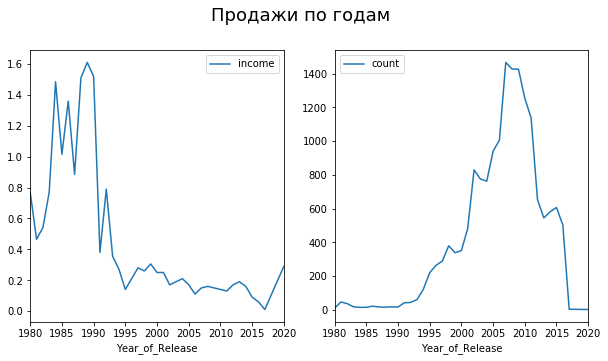

In [18]:
plt.subplots(figsize = (10, 5))

report = games.groupby('Year_of_Release').agg({'income': 'median'}).rename(columns = {'income': 'income'})
plot = report.plot(ax = plt.subplot(1, 2, 1))

report = games.groupby('Year_of_Release').agg({'Name': 'count'}).rename(columns = {'Name': 'count'})
plot = report.plot(ax = plt.subplot(1, 2, 2))

plt.suptitle('Продажи по годам',fontsize=18, y=1)

продажи по годам падают, максимальные в 85-90. но здесь не учитыват мобильные игры

In [21]:
plat = games.pivot_table(index = ['Platform'], values=['Name'], aggfunc=['count'])
plat.columns = ['count']
plat.sort_values('count',ascending = False).head()

,count
Platform,
PS2,2161
DS,2152
PS3,1331
Wii,1320
X360,1262


на PS2 платформе было выпущено больше всего игр

In [22]:
genre = games.pivot_table(index = ['Genre'], values=['Name'], aggfunc=['count'])
genre.columns = ['count']
genre.sort_values('count',ascending = False).head()

,count
Genre,
Action,3370
Sports,2348
Misc,1750
Role-Playing,1500
Shooter,1323


Action жанра больше всего

In [23]:
games['User_Score'] = games['User_Score'].astype('float')

In [24]:
max_u = max(games['User_Score'])
games.loc[(games['User_Score'] == max_u)]

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
14414,Breath of Fire III,PSP,2005,Role-Playing,0.0,0.02,0.0,0.01,NaN,9.7,T,0.03


максимальная оценка от пользователей

In [25]:
min_u = min(games['User_Score'])
games.loc[(games['User_Score'] == min_u)]

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E,0.72


минимальная оценка от пользователей

In [26]:
max_с = max(games['Critic_Score'])
games.loc[(games['Critic_Score'] == max_с)]

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34


максимальная оценка от критиков

In [27]:
min_с = min(games['Critic_Score'])
games.loc[(games['Critic_Score'] == min_с)]

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
13690,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04


минимальная оценка от критиков

In [28]:
print(games['User_Score'].corr(games['Critic_Score']))

0.5808778320767237


корреляция между оценками критиков и пользовательскими оценками,на самом деле, корреляция должна быть несколько выше, но медианы ее "размазывают"

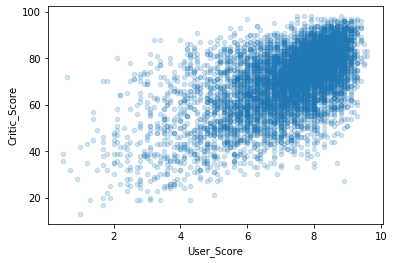

In [29]:
plot = games.plot(kind = 'scatter', x = 'User_Score', y = 'Critic_Score', alpha = 0.2)

**Довольно сильная корреляция оценок критиков и пользователей.  
Увеличиваются оценки пользователей и оценки ритиков тоже увеличиваются и наоборот.**


### Шаг 3. Портрет пользователя каждого региона <a id="step5"></a>   

#### Топ 5 жанров по регионам <a id="step6"></a>   

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:  
топ-5 предпочтительных жанров**

In [30]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [31]:
genre_NA = games.pivot_table(index = ['Genre'], values=['NA_players'], aggfunc=['sum'])
genre_NA.columns = ['NA_players']
genre_NA.sort_values('NA_players',ascending = False).head(5)

,NA_players
Genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


топ 5 жанров для Северной Америки

In [32]:
genre_EU = games.pivot_table(index = ['Genre'], values=['EU_players'], aggfunc=['sum'])
genre_EU.columns = ['EU_players']
genre_EU.sort_values('EU_players',ascending = False).head()

,EU_players
Genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


топ 5 жанров для Европы

In [33]:
genre_RU = games.pivot_table(index = ['Genre'],values=['RU_players'], aggfunc=['sum'])
genre_RU.columns = ['RU_players']
genre_RU.sort_values('RU_players',ascending = False).head()

,RU_players
Genre,
Role-Playing,355.46
Action,161.44
Sports,135.54
Platform,130.83
Misc,108.11


топ 5 жанров для России

#### Продажи игр по годам, платформам, жанрам <a id="step7"></a>   

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:  
в какие года пользователи были наиболее активны (больше всего покупали игры)**

In [36]:
year_NA = games.pivot_table(index = ['Year_of_Release'], values=['NA_players'], aggfunc=['sum'])
year_NA.columns = ['NA_players']
year_NA.sort_values('NA_players',ascending = False).head()

,NA_players
Year_of_Release,
2007,369.04
2008,348.69
2009,335.55
2010,300.65
2006,262.13


больше всего покупали игры в Северной Америке

In [37]:
year_EU = games.pivot_table(index = ['Year_of_Release'], values=['EU_players'], aggfunc=['sum'])
year_EU.columns = ['EU_players']
year_EU.sort_values('EU_players',ascending = False).head()

,EU_players
Year_of_Release,
2009,187.94
2007,182.28
2008,181.14
2010,171.42
2011,162.97


больше всего покупали игры в Европе

In [38]:
year_RU = games.pivot_table(index = ['Year_of_Release'], values=['RU_players'], aggfunc=['sum'])
year_RU.columns = ['RU_players']
year_RU.sort_values('RU_players',ascending = False).head()

,RU_players
Year_of_Release,
2006,73.74
2007,66.99
2009,61.89
2008,60.25
2010,59.49


больше всего покупали игры в России

#### Топ платформ по регионам  <a id="step8"></a>   

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:  
топ-5 предпочтительных платформ**

In [39]:
plat_NA = games.pivot_table(index = ['Platform'], values=['NA_players'], aggfunc=['sum'])
plat_NA.columns = ['NA_players']
plat_NA.sort_values('NA_players',ascending = False).head()

,NA_players
Platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.67


топ 5 платформ для Северной Америки

In [40]:
plat_EU = games.pivot_table(index = ['Platform'], values=['EU_players'], aggfunc=['sum'])
plat_EU.columns = ['EU_players']
plat_EU.sort_values('EU_players',ascending = False).head()

,EU_players
Platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


топ 5 платформ для Европы

In [41]:
plat_NA = games.pivot_table(index = ['Platform'], values=['RU_players'], aggfunc=['sum'])
plat_NA.columns = ['RU_players']
plat_NA.sort_values('RU_players',ascending = False).head()

,RU_players
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


топ 5 платформ для России

### Рейтинг по регионам  <a id="step9"></a>   

**Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:  
какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)**

In [42]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating,income
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [43]:
fr_r = games.pivot_table(index = ['Rating'],values=['NA_players'], aggfunc=['count','sum'])
fr_r.columns = ['NA_count','NA_sum']
fr_r.sort_values('NA_sum',ascending = False)

,NA_count,NA_sum
Rating,,
E,3991,1293.26
T,2961,759.75
M,1563,748.48
E10+,1420,353.32
K-A,3,2.56
EC,8,1.53
AO,1,1.26
RP,3,0.00


In [44]:
fr_r = games.pivot_table(index = ['Rating'],values=['EU_players'], aggfunc=['count','sum'])
fr_r.columns = ['EU_count','EU_sum']
fr_r.sort_values('EU_sum',ascending = False)

,EU_count,EU_sum
Rating,,
E,3991,710.25
M,1563,483.97
T,2961,427.03
E10+,1420,188.52
AO,1,0.61
K-A,3,0.27
EC,8,0.11
RP,3,0.08


In [45]:
fr_r = games.pivot_table(index = ['Rating'],values=['RU_players'], aggfunc=['count','sum'])
fr_r.columns = ['RU_count','RU_sum']
fr_r.sort_values('RU_sum',ascending = False)

,RU_count,RU_sum
Rating,,
E,3991,198.11
T,2961,151.40
M,1563,64.24
E10+,1420,40.20
K-A,3,1.46
AO,1,0.00
EC,8,0.00
RP,3,0.00


### Шаг 4. Проверка гипотез <a id="step10"></a>   

####   Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый<a id="step11"></a>   

**1) нулевая гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый, т е  равны  
     альтернативная гипотеза: средний пользовательский рейтинг платформ PS2 и PS3 различается, т е рейтинги не равны**

In [46]:
r_ps2 = games.query('Platform == "PS2"')
r_ps3 = games.query('Platform == "PS3"')

In [47]:
r_ps2 = r_ps2.dropna(subset=['User_Score'])
r_ps3 = r_ps3.dropna(subset=['User_Score'])

In [48]:
alpha = .05 

In [49]:
results = st.ttest_ind(
    r_ps2['User_Score'], 
    r_ps3['User_Score'],
    equal_var = True)

In [50]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5742610791426753e-47
Отвергаем нулевую гипотезу


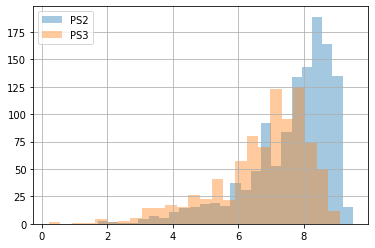

In [51]:
plot = r_ps2['User_Score'].hist(alpha = 0.4, bins = 25, label = 'PS2')
plot = r_ps3['User_Score'].hist(alpha = 0.4, bins = 25, label = 'PS3')
legend = plt.legend()

исключил медиану

####   Средний пользовательский рейтинг жанров Action и Sports не различается<a id="step12"></a>   

**2) нулевая гипотеза: средний пользовательский рейтинг жанров Action и Sports не различается, т е  равны  
     альтернативная гипотеза: средний пользовательский рейтинг жанров Action и Sports различается, т е рейтинги не равны**

In [52]:
r_A = games.query('Genre == "Action"')
r_S = games.query('Genre == "Sports"')

r_A = r_A.dropna(subset=['User_Score'])
r_S = r_S.dropna(subset=['User_Score'])

alpha = .05 

results = st.ttest_ind(
    r_A['User_Score'], 
    r_S['User_Score'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


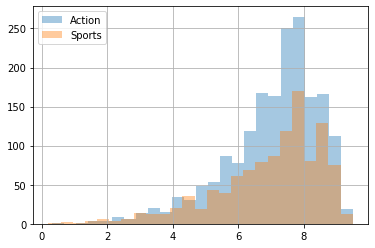

In [53]:
plot = r_A['User_Score'].hist(alpha = 0.4, bins = 25, label = 'Action')
plot = r_S['User_Score'].hist(alpha = 0.4, bins = 25, label = 'Sports')
legend = plt.legend()

исключил медиану

### Шаг 5. Вывод<a id="step13"></a>   

**ВЫВОДЫ:** 

1) что в 80-х, начале 90-х выходило мало игр и поэтому прибыль улетает вверх просто потому, что выборка мала. Как только стало больше игр, доходы падают.  

2)
на DS платформе выпущено больше всего игр  
Action жанра больше всего  
 0  < User_Score < 9.7  
 13 < Critic_Score < 98  
 
3) Наиболее популярный жанр Action в Сев. Америке и Европе. В отличие от России, где самый популярный Role-Playing  
В начале 2000-х продажи выше всго во всех регионах  
Популярные платформы:
X360 - Сев америка
PS2 - Европа
DS  - Россия

4) Довольно сильная корреляция оценок критиков и пользователей (0.58). Что означает, в общем мнения критиков и пользователей совпадают.

5) средний пользовательский рейтинг платформ PS2 и PS3 различается, т е рейтинги не равны  
6) средний пользовательский рейтинг жанров Action и Sports не различается, т е равны  

**Рекомендации о выпуске игры:**  
Если выпускать игру в Сев. амер. или Европе, то в жанре Action или Sport и на платфомах X360 или PS2. 
Если выпускать игру в России, то в жанре Role-Playing или Action и на платфомах DS или PS. 
Для 13-19 лет или для всех   
